In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")




In [5]:
df = pd.read_csv('~/Workspace/misc/Blog//Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


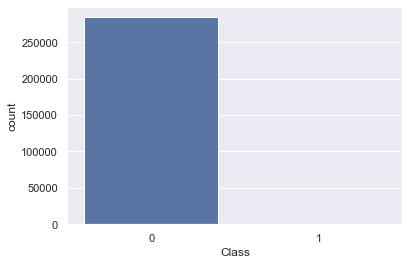

In [6]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Class", data=df[['Class']])

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Amount', ylabel='Density'>

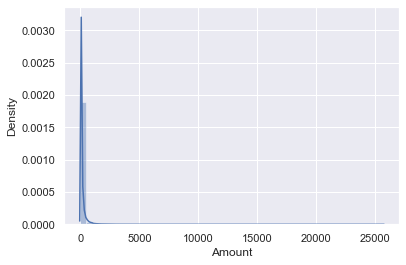

In [8]:
sns.distplot(df['Amount'])

<AxesSubplot:xlabel='Time', ylabel='Density'>

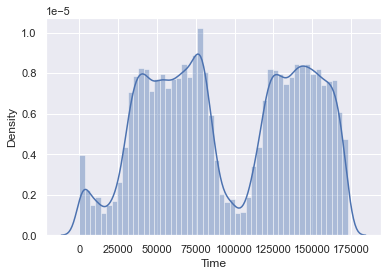

In [9]:
sns.distplot(df['Time'])

In [10]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
81790.0      1
54289.0      1
37651.0      1
112892.0     1
119665.0     1
Name: Time, Length: 124592, dtype: int64

In [11]:
from sklearn.preprocessing import RobustScaler
# RobustScaler is less prone to outliers. x_scaled = (x-median)/(value at 75% percentile - value at 25% percentile)
# Scaled data is unbounded.

rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace = True)


In [12]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [13]:
df.shape

(284807, 31)

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100, stratify=y)

In [16]:
y_train.value_counts()[1]/len(y_train)*100

0.17254870488152324

In [17]:
y_test.value_counts()[1]/len(y_test)*100

0.17321489179921118

In [18]:
# Create a new sample where we have 492 fraud and 492 non-fraud
#Shuffle the data
df = df.sample(frac=1)

In [19]:
fraud_df = df.loc[df['Class'] == 1]

In [20]:
non_fraud_df = df.loc[df['Class'] == 0][:492]

In [21]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
53450,1.401374,-1.603114,-0.381829,-3.636509,0.275532,3.613538,-2.033246,1.047567,1.775692,-0.865049,...,0.129584,-0.135705,1.033507,0.690417,-0.555063,0.163779,0.036819,0,-0.184727,-0.454752
20198,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,3.245086,...,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,1,1.157130,-0.632526
181515,-0.250426,-0.006970,0.023678,-2.450870,0.352003,-0.715146,0.525781,-0.053043,-1.338448,0.342205,...,1.630920,-0.107779,0.804605,-0.339924,-0.188925,0.383869,0.262809,0,0.333263,0.473619
6719,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,-6.810813,...,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1,-0.293440,-0.896122
204079,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,-0.989431,...,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1,1.208831,0.592230


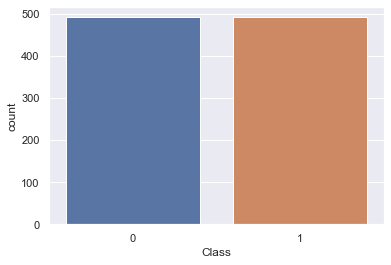

In [22]:
ax = sns.countplot(x="Class", data=new_df[['Class']])

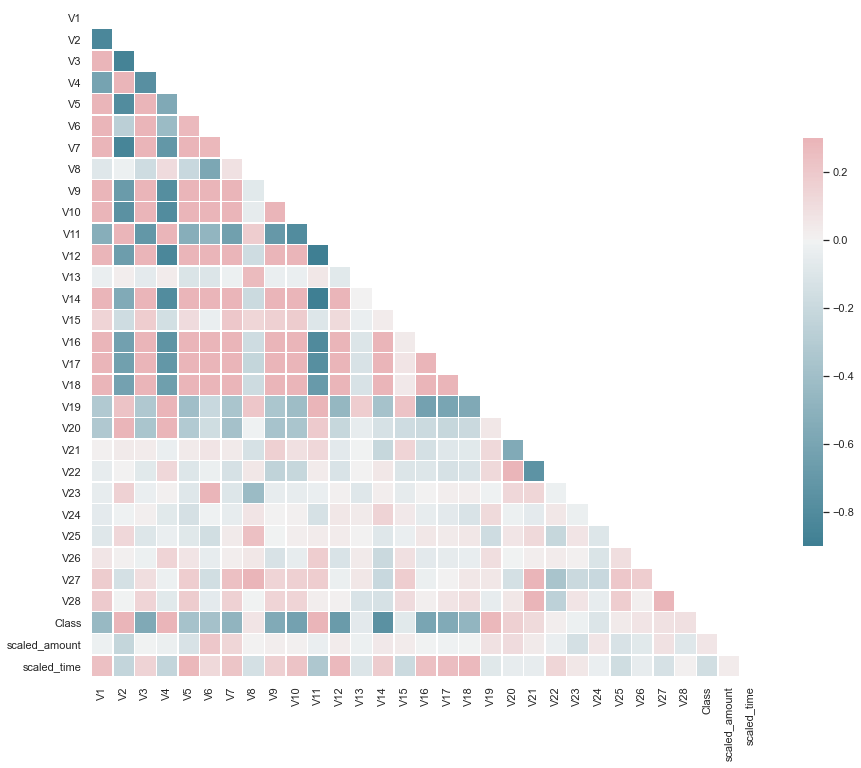

In [23]:
#correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corrmat = new_df.corr() # corr calculation

# Simplest way: 
# sns.heatmap(corrmat, vmax=.8, square=True);

# Create a white mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, mask=mask, 
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

- Negative Correlations: V17, V14, V12 and V10 are negatively correlated (Darker blue squares on Class row)
- Positive Correlations: V2, V4, V11, and V19 are positively correlated (Darker pink squares on Class row)

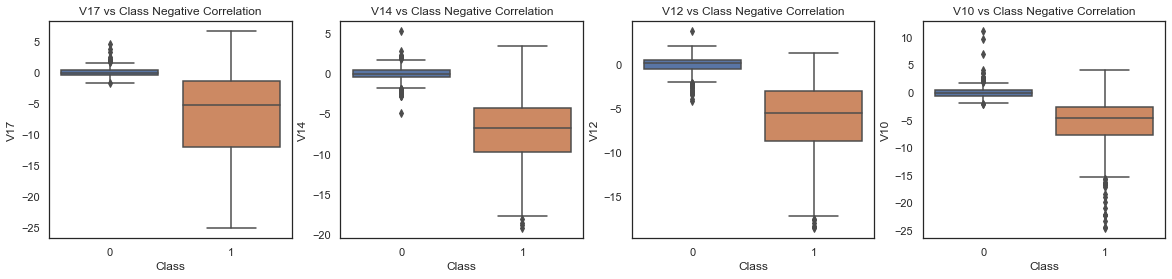

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

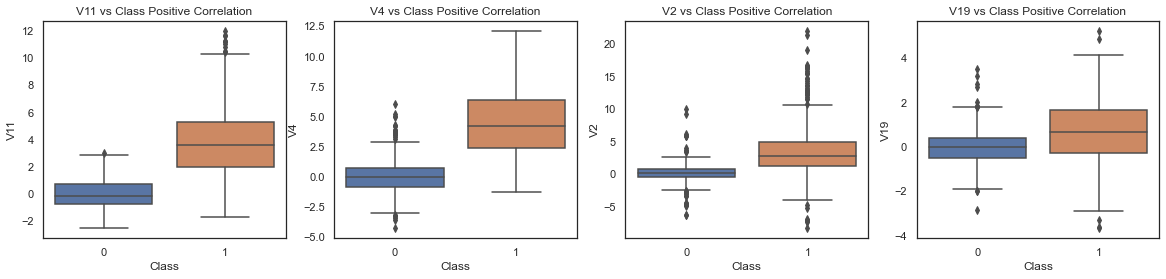

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df,ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df,ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

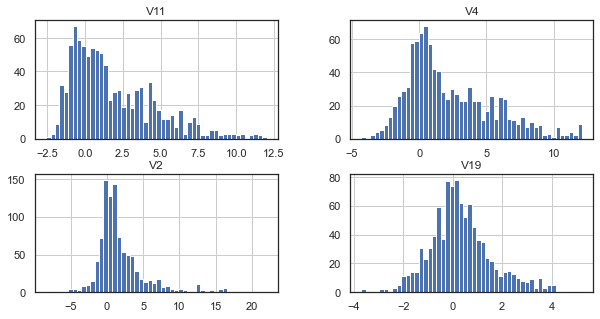

In [29]:
new_df[['V11','V4','V2','V19']].hist(bins=50, figsize=(10,5))
plt.show()

In [56]:
X_bal = new_df.drop('Class', axis=1)
y_bal = new_df['Class']

In [57]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bal, y_bal, train_size = 0.7,test_size = 0.3, random_state = 100)

In [60]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [61]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_b, y_train_b)
    training_score = cross_val_score(classifier, X_train_b, y_train_b, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [69]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_b, y_train_b)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

In [70]:
log_reg.score(X_train_b,y_train_b)

0.9462209302325582

In [71]:
log_reg.score(X_test_b,y_test_b)

0.9493243243243243

In [76]:
log_reg_score = cross_val_score(log_reg, X_train_b, y_train_b, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.6%


In [99]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,confusion_matrix
y_pred_b = log_reg.predict(X_train_b)

In [80]:
recall_score(y_train_b, y_pred_b)

0.9134078212290503

In [81]:
precision_score(y_train_b, y_pred_b)

0.9819819819819819

In [90]:
y_pred = log_reg.predict(X_test)

In [91]:
precision_score(y_test, y_pred)

0.05441607367099205

In [92]:
recall_score(y_test, y_pred)

0.8783783783783784

In [93]:
accuracy_score(y_test, y_pred)

0.9733506548225133

In [97]:
confusion_matrix(y_test, y_pred)


array([[83036,  2259],
       [   18,   130]])

In [100]:
confusion_matrix(y_train_b, y_pred_b)



array([[324,   6],
       [ 31, 327]])

In [72]:
clf = LogisticRegression(random_state=0).fit(X_train_b, y_train_b)

In [73]:
clf.score(X_train_b,y_train_b)

0.9505813953488372

In [74]:
y_pred = clf.predict(X_test_b)

In [75]:
clf.score(X_test_b,y_test_b)

0.9527027027027027

In [66]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [50]:
np.unique(y_pred)

array([0, 1])

In [82]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_train,y_train)

0.9992777030958447

In [68]:
clf.score(X_test,y_test)

0.9990754069964772

In [83]:
y_pred = clf.predict(X_train)

In [84]:
recall_score(y_train, y_pred)

0.6511627906976745

In [85]:
precision_score(y_train, y_pred)

0.9032258064516129

In [102]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

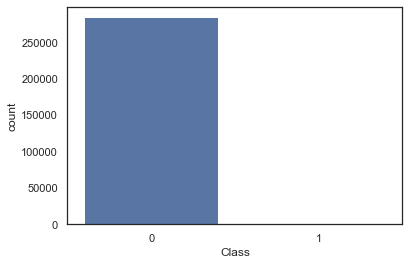

In [104]:
ax = sns.countplot(x="Class", data=df[['Class']])

In [108]:
X = df.drop('Class', axis=1)
y = df['Class']

In [109]:
len(y)

284807

In [110]:
# transform the dataset
oversample = SMOTE()
X_smo, y_smo = oversample.fit_resample(X, y)

In [111]:
len(y_smo)

568630

In [115]:
np.array(np.unique(y, return_counts=True)).T

array([[     0, 284315],
       [     1,    492]])

In [116]:
np.array(np.unique(y_smo, return_counts=True)).T

array([[     0, 284315],
       [     1, 284315]])

In [117]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smo, y_smo, train_size = 0.7,test_size = 0.3, random_state = 100)

In [118]:
clf = LogisticRegression(random_state=0).fit(X_train_s, y_train_s)
clf.score(X_train_s,y_train_s)

0.9489173225873716

In [119]:
y_pred_s = clf.predict(X_train_s)

In [120]:
precision_score(y_train_s, y_pred_s)

0.9748449437005883

In [121]:
recall_score(y_train_s, y_pred_s)

0.9214565363983132

In [122]:
clf.score(X_test_s,y_test_s)

0.948009543405495

In [123]:
y_pred_s = clf.predict(X_test_s)

In [124]:
precision_score(y_test_s, y_pred_s)

0.9749548121920419

In [125]:
recall_score(y_test_s, y_pred_s)

0.9200205614682757